In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import xarray as xr

In [3]:
#conda install openpyxl

In [4]:
# creating data frames based on each sheet of the excel data
#df= pd.read_excel('~/da-EDA_project2/ESG_Data_Suite-sampledata/eutaxonomy_sampledata.xlsx',sheet_name='21-07-2020_EU_Taxonomy_Dataset_', header=0)


In [5]:
#df.info()

In [6]:
#df.head(20)
#df.describe()

In [7]:
df2_mutual_funds= pd.read_csv('~/da-EDA_project2/archive (1)/MutualFunds.csv', header=0)

In [ ]:
df2_mutual_funds.info()


In [9]:
#df2_mutual_funds

In [ ]:
df2_mutual_funds.head()

In [34]:
# Count of non-null entries for each column
non_null_counts = df2_mutual_funds.count()

# Data types of each column
data_types = df2_mutual_funds.dtypes

# Combine non-null counts and data types into a new DataFrame
column_info = pd.DataFrame({'Non-Null Counts': non_null_counts, 'Data Types': data_types})

# Display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Display the column info
#print(column_info)


In [ ]:
column_info

In [13]:
#column_info.head(298)

In [ ]:
df2_mutual_funds.describe()

In [ ]:
#df2_mutual_funds['fund_alpha_3years'].describe()
#fund_beta_3years=df2_mutual_funds['fund_beta_3years']
df2_mutual_funds['fund_beta_3years'].describe()


In [ ]:
df2_mutual_funds['fund_annual_report_net_expense_ratio'].describe()

In [ ]:
df2_mutual_funds['fund_mean_annual_return_10years'].describe()
	

In [ ]:
df2_mutual_funds['esg_score'].describe()


In [ ]:

df2_mutual_funds['fund_alpha_10years'].describe()

In [ ]:
df2_mutual_funds['fund_beta_10years'].describe()

In [ ]:
df2_mutual_funds['fund_sharpe_ratio_10years'].describe()

In [ ]:
df2_mutual_funds['fund_sharpe_ratio_5years'].describe()

In [ ]:
df2_mutual_funds['fund_annual_report_net_expense_ratio'].describe()

In [57]:
# Example: Creating a new dataset with selected columns
mutual_fund_small_dataset = df2_mutual_funds[['fund_symbol','fund_long_name','inception_date', 'total_net_assets','size_type','fund_category','fund_family','fund_yield','fund_mean_annual_return_10years','fund_alpha_10years', 'fund_beta_10years','fund_sharpe_ratio_10years','fund_annual_report_net_expense_ratio','esg_score','environment_score','social_score','governance_score','morningstar_risk_rating']]

# Example: Creating a new dataset with filtered data
#new_dataset = df_existing[df_existing['column1'] > 100]
mutual_fund_small_dataset.head(10)

,fund_symbol,fund_long_name,inception_date,total_net_assets,size_type,fund_category,fund_family,fund_yield,fund_mean_annual_return_10years,fund_alpha_10years,fund_beta_10years,fund_sharpe_ratio_10years,fund_annual_report_net_expense_ratio,esg_score,environment_score,social_score,governance_score,morningstar_risk_rating
0,AAAAX,DWS RREEF Real Assets Fund - Class A,2007-07-30,2.979347e+09,Large,World Allocation,DWS,0.0186,0.42,-2.79,0.96,0.48,0.0122,22.46,8.42,7.43,5.43,3.0
1,AAAEX,Virtus AllianzGI Health Sciences Fund Class P,2020-07-13,1.953489e+08,Large,Health,Virtus,NaN,1.18,6.14,0.75,0.96,0.0109,27.05,1.42,12.96,8.40,2.0
2,AAAFX,American Century One Choice Blend+ 2015 Portfo...,2021-03-10,2.594600e+04,Large,Target-Date 2015,American Century Investments,NaN,NaN,NaN,NaN,NaN,0.0058,NaN,NaN,NaN,NaN,NaN
3,AAAGX,Thrivent Large Cap Growth Fund Class A,1999-10-29,2.078607e+09,Large,Large Growth,Thrivent Funds,NaN,1.40,0.91,1.08,1.03,0.0108,20.55,2.04,10.13,8.03,4.0
4,AAAHX,American Century One Choice Blend+ 2015 Portfo...,2021-03-10,2.594600e+04,Large,Target-Date 2015,American Century Investments,NaN,NaN,NaN,NaN,NaN,0.0038,NaN,NaN,NaN,NaN,NaN
5,AAAIX,American Century Strategic Allocation: Aggress...,2000-08-01,8.483190e+08,Large,Allocation--70% to 85% Equity,American Century Investments,0.0083,0.87,-0.44,1.37,0.83,0.0063,23.10,4.00,9.01,6.82,3.0
6,AAAJX,American Century One Choice Blend+ 2015 Portfo...,2021-03-10,2.594600e+04,Large,Target-Date 2015,American Century Investments,NaN,NaN,NaN,NaN,NaN,0.0083,NaN,NaN,NaN,NaN,NaN
7,AAAKX,American Century One Choice Blend+ 2015 Portfo...,2021-03-10,2.594600e+04,Large,Target-Date 2015,American Century Investments,NaN,NaN,NaN,NaN,NaN,0.0108,NaN,NaN,NaN,NaN,NaN
8,AAALX,American Century One Choice Blend+ 2015 Portfo...,2021-03-10,2.594600e+04,Large,Target-Date 2015,American Century Investments,NaN,NaN,NaN,NaN,NaN,0.0023,NaN,NaN,NaN,NaN,NaN
9,AAAMX,American Century One Choice Blend+ 2020 Portfo...,2021-03-10,5.932200e+04,Large,Target-Date 2020,American Century Investments,NaN,NaN,NaN,NaN,NaN,0.0058,NaN,NaN,NaN,NaN,NaN


In [ ]:
mutual_fund_small_dataset.info()

In [60]:
# Define the weights for each variable
weight_return = 30
weight_yield = 30
weight_alpha = 10
weight_sharpe = 10
weight_beta = 10
weight_fees = 10

# Calculate the financial score
mutual_fund_small_dataset['financial_score'] =(weight_return * mutual_fund_small_dataset['fund_mean_annual_return_10years'])+(weight_yield * mutual_fund_small_dataset['fund_yield'])+(weight_alpha * mutual_fund_small_dataset['fund_alpha_10years'])+(weight_sharpe * mutual_fund_small_dataset['fund_sharpe_ratio_10years'])- (weight_beta * mutual_fund_small_dataset['fund_beta_10years']) - (weight_fees * mutual_fund_small_dataset['fund_annual_report_net_expense_ratio'])

# Print the resulting DataFrame
mutual_fund_small_dataset.head()


/var/folders/8y/gs6r14wx1js6z4qzlk6vpg100000gn/T/ipykernel_68183/3566883590.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutual_fund_small_dataset['financial_score'] =(weight_return * mutual_fund_small_dataset['fund_mean_annual_return_10years'])+(weight_yield * mutual_fund_small_dataset['fund_yield'])+(weight_alpha * mutual_fund_small_dataset['fund_alpha_10years'])+(weight_sharpe * mutual_fund_small_dataset['fund_sharpe_ratio_10years'])- (weight_beta * mutual_fund_small_dataset['fund_beta_10years']) - (weight_fees * mutual_fund_small_dataset['fund_annual_report_net_expense_ratio'])


,fund_symbol,fund_long_name,inception_date,total_net_assets,size_type,fund_category,fund_family,fund_yield,fund_mean_annual_return_10years,fund_alpha_10years,fund_beta_10years,fund_sharpe_ratio_10years,fund_annual_report_net_expense_ratio,esg_score,environment_score,social_score,governance_score,morningstar_risk_rating,financial_score
0,AAAAX,DWS RREEF Real Assets Fund - Class A,2007-07-30,2.979347e+09,Large,World Allocation,DWS,0.0186,0.42,-2.79,0.96,0.48,0.0122,22.46,8.42,7.43,5.43,3.0,-19.664
1,AAAEX,Virtus AllianzGI Health Sciences Fund Class P,2020-07-13,1.953489e+08,Large,Health,Virtus,NaN,1.18,6.14,0.75,0.96,0.0109,27.05,1.42,12.96,8.40,2.0,NaN
2,AAAFX,American Century One Choice Blend+ 2015 Portfo...,2021-03-10,2.594600e+04,Large,Target-Date 2015,American Century Investments,NaN,NaN,NaN,NaN,NaN,0.0058,NaN,NaN,NaN,NaN,NaN,NaN
3,AAAGX,Thrivent Large Cap Growth Fund Class A,1999-10-29,2.078607e+09,Large,Large Growth,Thrivent Funds,NaN,1.40,0.91,1.08,1.03,0.0108,20.55,2.04,10.13,8.03,4.0,NaN
4,AAAHX,American Century One Choice Blend+ 2015 Portfo...,2021-03-10,2.594600e+04,Large,Target-Date 2015,American Century Investments,NaN,NaN,NaN,NaN,NaN,0.0038,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
mutual_fund_small_dataset['financial_score'].describe()

In [65]:
# define a new coloumn called esg_ranking based on esg_score column and sort values in descending order---method min
mutual_fund_small_dataset['financial_ranking']=mutual_fund_small_dataset['financial_score'].rank(ascending=False, method='min')
mutual_fund_small_dataset['esg_ranking']=mutual_fund_small_dataset['esg_score'].rank(ascending=False, method='min')

# show me the output of esg_ranking column and esg_score column and fund_symbol column in descending order-- 
mutual_fund_small_dataset[['fund_long_name','size_type','financial_ranking','esg_ranking','financial_score','fund_symbol']].sort_values(by='financial_ranking',ascending=True).head(100)

/var/folders/8y/gs6r14wx1js6z4qzlk6vpg100000gn/T/ipykernel_68183/4125354581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutual_fund_small_dataset['financial_ranking']=mutual_fund_small_dataset['financial_score'].rank(ascending=False, method='min')
/var/folders/8y/gs6r14wx1js6z4qzlk6vpg100000gn/T/ipykernel_68183/4125354581.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutual_fund_small_dataset['esg_ranking']=mutual_fund_small_dataset['esg_score'].rank(ascending=False, method='min')


,fund_long_name,size_type,financial_ranking,esg_ranking,financial_score,fund_symbol
7090,William Blair International Growth Fund Class I,Large,1.0,13975.0,171.344,FSELX
6304,American Century Investments One Choice 2055 P...,Large,2.0,13982.0,168.125,FIKGX
5715,AAM/Bahl & Gaynor Income Growth Fund Class C,Large,3.0,13982.0,167.488,FELIX
5713,Virtus NFJ International Value Fund Class P,Large,4.0,13982.0,163.814,FELAX
22706,First Eagle Global Fund Class R4,Large,5.0,15070.0,159.288,VITAX
10881,First Eagle Gold Fund Class I,Large,6.0,14980.0,153.585,JGLTX
10589,Franklin Mutual U.S. Value Fund Advisor Class,Large,7.0,14973.0,152.861,JATIX
10590,Franklin Mutual U.S. Value Fund Class R6,Large,8.0,14973.0,152.581,JATNX
11255,Fidelity Advisor Health Care Fund Class C,Large,9.0,14973.0,151.843,JNGTX
20055,Baron Health Care Fund R6 Shares,Large,10.0,13415.0,151.514,SGTTX


In [64]:
mutual_fund_small_dataset[['fund_long_name','size_type','financial_ranking','esg_ranking','financial_score','fund_symbol']].sort_values(by='esg_ranking',ascending=True).head(100)

,fund_long_name,size_type,financial_ranking,esg_ranking,financial_score,fund_symbol
19268,AB Conservative Wealth Strategy Class R,Medium,13211.0,1.0,-190.339,RSNRX
19269,AAM/Phocas Real Estate Fund Class A Shares,Medium,13209.0,1.0,-186.567,RSNYX
19267,Appleseed Fund Investor Share,Medium,NaN,1.0,NaN,RSNKX
18772,Water Island Event-Driven Fund Class A,Medium,NaN,1.0,NaN,RGNCX
8346,Columbia Global Technology Growth Fund Institu...,Medium,NaN,5.0,NaN,GRHIX
8345,Adaptive Tactical Outlook Fund C Class,Medium,NaN,5.0,NaN,GRHAX
16002,BNY Mellon Active MidCap Fund - Class A,Small,13071.0,7.0,-81.553,OSPMX
20446,Brandes Small Cap Value Fund Class R6,Small,13074.0,7.0,-81.807,SPMQX
20449,BlackRock SMID-Cap Growth Equity Fund Class K,Small,13095.0,7.0,-88.224,SPNNX
13905,Meeder Tactical Income Fund Adviser Class,Small,13075.0,7.0,-82.133,MLPZX


In [ ]:
# 30 All flights Plot 
plt.style.use('seaborn-bright')
plt.figure(figsize=(6, 4))
flight_data_df[['hour_dep_delay','hour_arr_delay']].plot(kind='box').yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
plt.xticks(ticks=[1, 2], labels=['dep_delay', 'arr_delay'], rotation=45)
plt.ylabel('hours')
plt.title("All Flights Performance \n ", fontsize = 15)
plt.show()

# Hurricane flights plot 
plt.style.use('seaborn-bright')
plt.figure(figsize=(6, 4))
flights_hurricane[['hour_dep_delay','hour_arr_delay']].plot(kind='box').yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
plt.xticks(ticks=[1, 2], labels=['dep_delay', 'arr_delay'], rotation=45)
plt.ylabel('hours')
plt.title("Flights Performance during Hurricane ", fontsize = 15)
plt.show()
display

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort the DataFrame by 'Value' column in descending order
mutual_fund_small_dataset_sorted = mutual_fund_small_dataset.sort_values(by='fund_mean_annual_return_10years', ascending= False)


# Assign rankings based on 'Value' column
mutual_fund_small_dataset_sorted['Rank'] = mutual_fund_small_dataset_sorted['fund_mean_annual_return_10years'].rank(ascending=False)

# Assign rankings based on 'Value' column

# Print the DataFrame with 'Rank' column


print(mutual_fund_small_dataset_sorted)




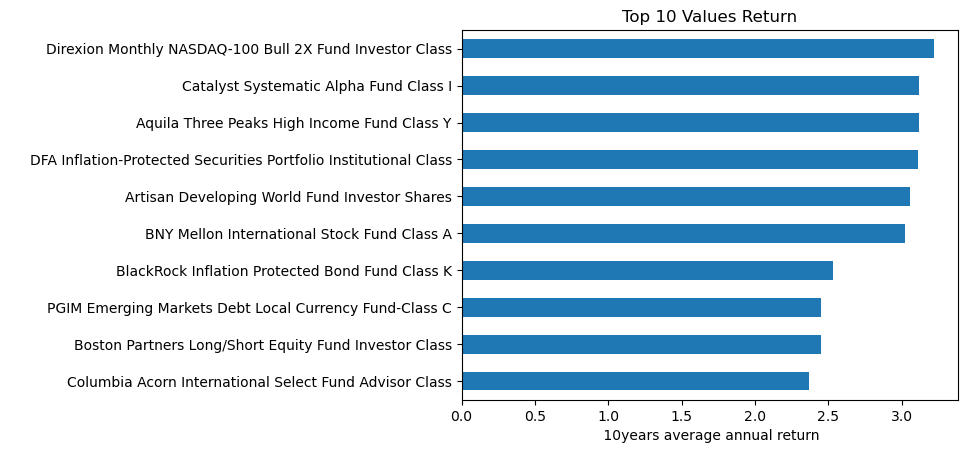

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort the DataFrame by 'Value' column in descending order
mutual_fund_small_dataset_sorted = mutual_fund_small_dataset.sort_values(by='fund_mean_annual_return_10years', ascending= False )

# Select the top 10 rows

top_10 = mutual_fund_small_dataset_sorted.head(10)

# Reverse the order
top_10 = top_10.iloc[::-1]

# Plot the bar chart
top_10.plot(x='fund_long_name', y='fund_mean_annual_return_10years', kind='barh')

# Set the labels and title
#plt.xticks([])
plt.xlabel(' 10years average annual return')
plt.ylabel(' ')
plt.title('Top 10 Values Return')

# Remove legend
plt.legend().remove()

# Display the chart
plt.show()


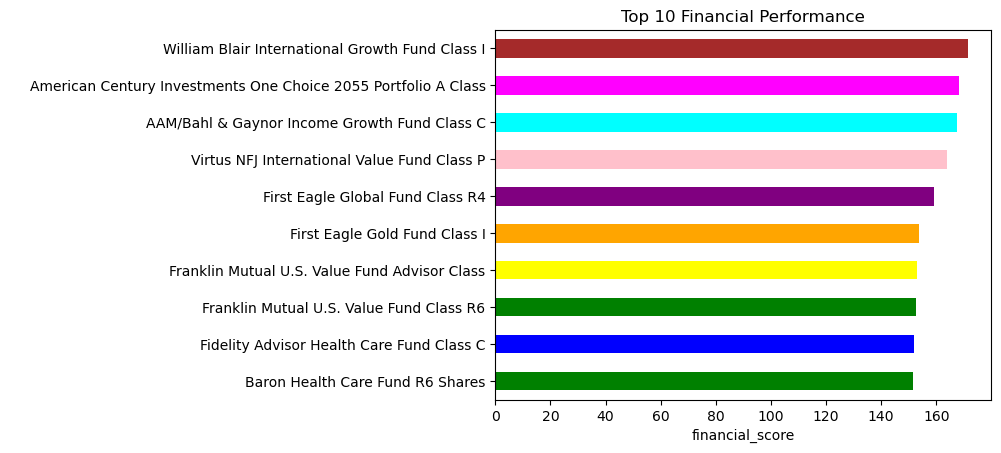

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort the DataFrame by 'Value' column in descending order
mutual_fund_small_dataset_sorted = mutual_fund_small_dataset.sort_values(by='financial_score', ascending=False)

# Select the top 10 rows
top_10 = mutual_fund_small_dataset_sorted.head(10)

# Reverse the order
top_10 = top_10.iloc[::-1]

# Define custom colors for each bar
colors = ['green', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'cyan', 'magenta', 'brown']

# Plot the bar chart with custom colors
top_10.plot(x='fund_long_name', y='financial_score', kind='barh', color=colors)

# Set the labels and title
plt.xlabel('financial_score')
plt.ylabel(' ')
plt.title('Top 10 Financial Performance')

# Remove legend
plt.legend().remove()

# Display the chart
plt.show()


/var/folders/8y/gs6r14wx1js6z4qzlk6vpg100000gn/T/ipykernel_68183/484609060.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('Greens')


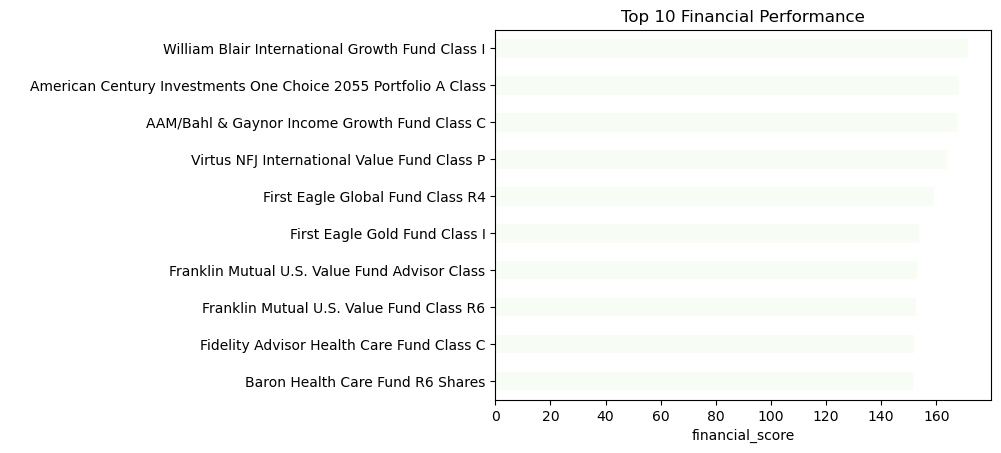

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Sort the DataFrame by 'Value' column in descending order
mutual_fund_small_dataset_sorted = mutual_fund_small_dataset.sort_values(by='financial_score', ascending=False)

# Select the top 10 rows
top_10 = mutual_fund_small_dataset_sorted.head(10)

# Reverse the order
top_10 = top_10.iloc[::-1]

# Define the colormap for shades of blue
colormap = cm.get_cmap('Greens')

# Plot the bar chart with different shades of blue
top_10.plot(x='fund_long_name', y='financial_score', kind='barh', colormap=colormap)

# Set the labels and title
plt.xlabel('financial_score')
plt.ylabel(' ')
plt.title('Top 10 Financial Performance')

# Remove legend
plt.legend().remove()

# Display the chart
plt.show()


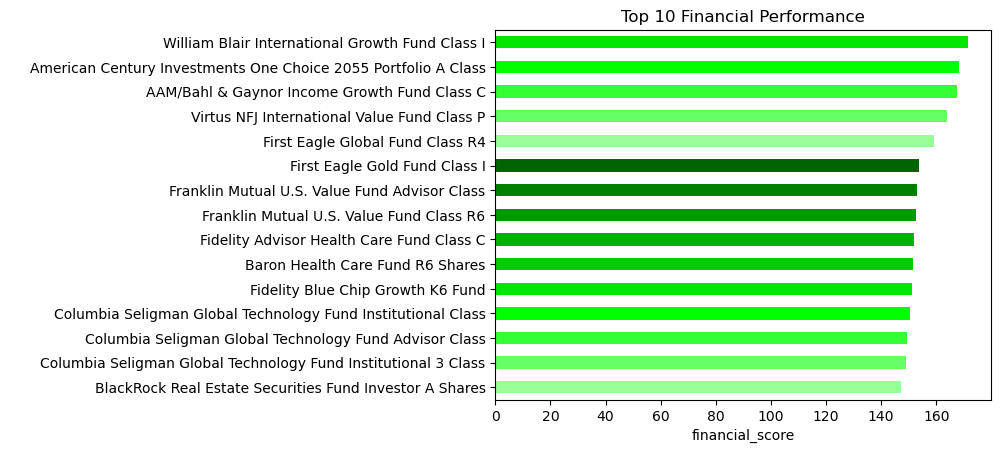

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort the DataFrame by 'Value' column in descending order
mutual_fund_small_dataset_sorted = mutual_fund_small_dataset.sort_values(by='financial_score', ascending=False)

# Select the top 10 rows
top_10 = mutual_fund_small_dataset_sorted.head(15)

# Reverse the order
top_10 = top_10.iloc[::-1]

# Define darker shades of green
#shades_of_green = ['#006400', '#008000', '#009900', '#00B200', '#00CC00', '#00E600', '#00FF00', '#33FF33', '#66FF66', '#99FF99']
shades_of_green = ['#99FF99', '#66FF66','#33FF33','#00FF00','#00E600','#00CC00','#00B200','#009900','#008000','#006400']

# Plot the bar chart with different shades of green
top_10.plot(x='fund_long_name', y='financial_score', kind='barh', color=shades_of_green)

# Set the labels and title
plt.xlabel('financial_score')
plt.ylabel(' ')
plt.title('Top 10 Financial Performance')

# Remove legend
plt.legend().remove()

# Display the chart
plt.show()


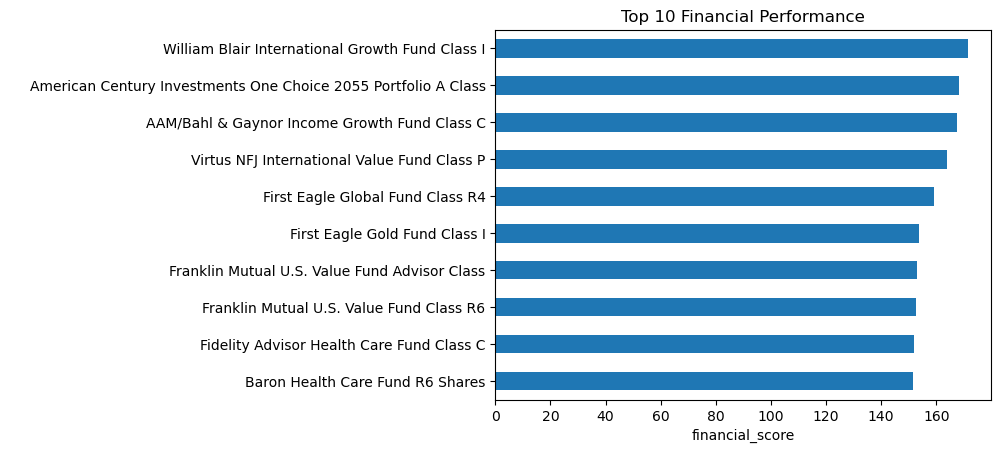

In [72]:


# Sort the DataFrame by 'Value' column in descending order
mutual_fund_small_dataset_sorted = mutual_fund_small_dataset.sort_values(by='financial_score', ascending= False )

# Select the top 10 rows

top_10 = mutual_fund_small_dataset_sorted.head(10)

# Reverse the order
top_10 = top_10.iloc[::-1]



# Plot the bar chart
top_10.plot(x='fund_long_name', y='financial_score', kind='barh')
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'cyan', 'magenta', 'brown']
# Set the labels and title
#plt.xticks([])
plt.xlabel('financial_score')
plt.ylabel(' ')
plt.title('Top 10 Financial Performance')

# Remove legend
plt.legend().remove()

# Display the chart
plt.show()

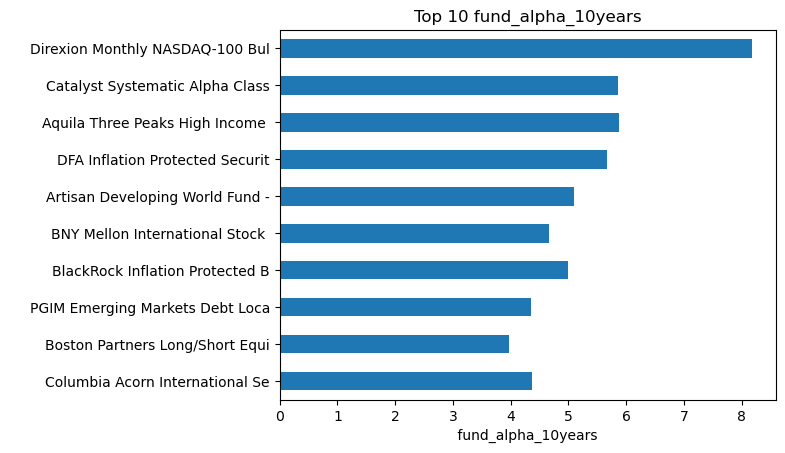

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort the DataFrame by 'Value' column in descending order
mutual_fund_small_dataset_sorted = mutual_fund_small_dataset.sort_values(by='fund_alpha_10years', ascending= True )

# Select the top 10 rows

top_10_alpha = mutual_fund_small_dataset_sorted.head(10)

# Reverse the order
top_10_alpha = top_10.iloc[::1]

# Plot the bar chart
top_10_alpha.plot(x='fund_short_name', y='fund_alpha_10years', kind='barh')

# Set the labels and title
#plt.xticks([])
plt.xlabel(' fund_alpha_10years ')
plt.ylabel(' ')
plt.title('Top 10 fund_alpha_10years')

# Remove legend
plt.legend().remove()

# Display the chart
plt.show()

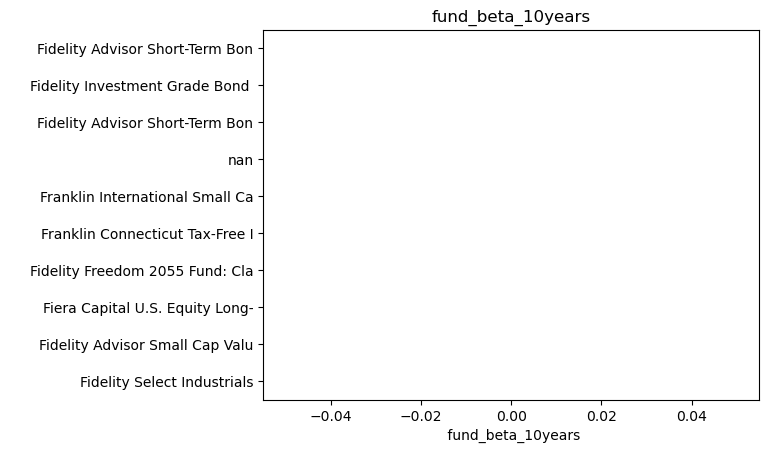